# 如何绘制数据集的可视化

## 首先绘制数据集的种类和对应数量的条形图

In [1]:
from glob import glob
import pandas as pd
import numpy as np
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
from tqdm import tqdm

加载数据集路径，数据集的路径如下：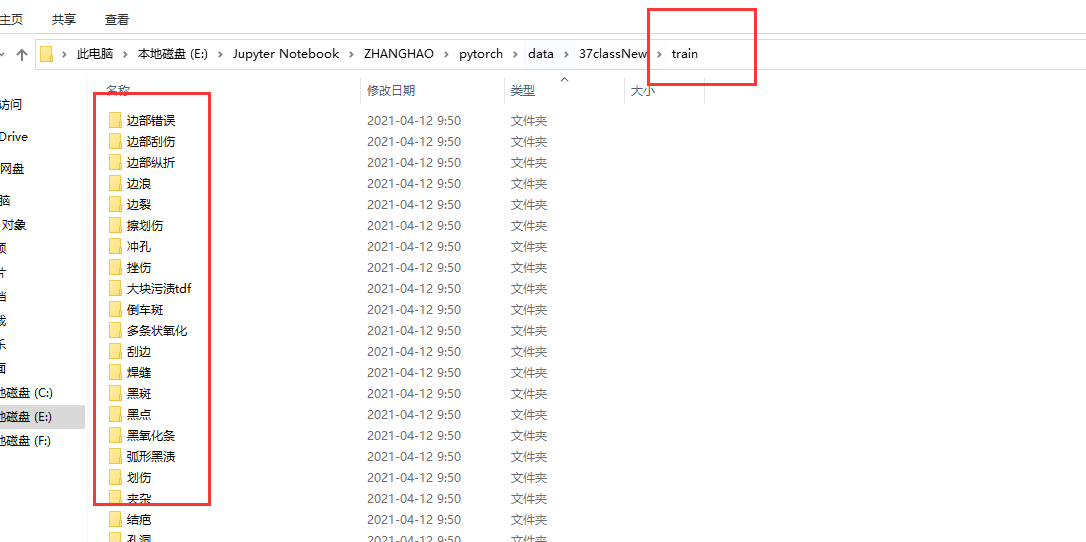

In [2]:
# 训练集探索
#数据集根目录
TRAIN_DATASET_PATH = 'E:\\Jupyter Notebook\\ZHANGHAO\\pytorch\\data\\37classNew\\train'
# TRAIN_DATASET_PATH = "E:\\Jupyter Notebook\\ZHANGHAO\\pytorch\\data\\带钢缺陷数据集\\数据集\\train"
#一个*表示根目录下对应类别文件夹，第er个*表示各类文件中的文件
image_fns = glob(os.path.join(TRAIN_DATASET_PATH, '*', '*.*'))

# print(image_fns[0].split('\\')[-2])
label_names = [s.split('\\')[-2] for s in image_fns]#获取标签

unique_labels = list(set(label_names))#将不一样的标签放到一个列表中

print(label_names)
print(unique_labels)

In [4]:
# 类别数
print("类别数",len(unique_labels))

#%%

# 图片总数
print("图片数",len(image_fns))

类别数 37
图片数 6702


In [6]:
# 每个类别的数量
dir_lst = os.listdir(TRAIN_DATASET_PATH)#根目录下所有文件夹的名字
# print(dir_lst)
number_lst = []
for i in dir_lst:
    path = os.path.join(TRAIN_DATASET_PATH,i)#各类的路径
    if os.path.isdir(path):
        num = len(glob(os.path.join(path,'*')))#各类路径中的文件个数
        number_lst.append(num)#存储各类数量
        if num == 0:
            print(i)
            
print(number_lst)
print(len(number_lst))

[93, 53, 37, 349, 297, 260, 85, 230, 248, 137, 13, 77, 122, 197, 11, 121, 245, 121, 35, 305, 97, 309, 277, 587, 449, 499, 35, 13, 17, 25, 100, 61, 169, 164, 357, 457, 50]
37


绘制条形图

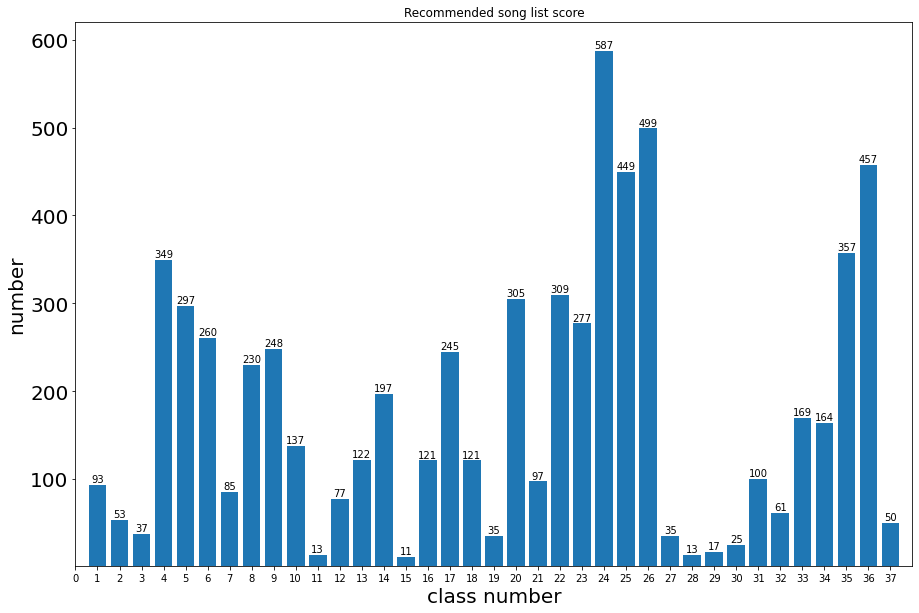

In [7]:
x = range(1,38)#横坐标
y = number_lst#纵坐标
fig, ax = plt.subplots(figsize=(15, 10))#设置图表大小，以及得到ax
# 截尾平均数
# means = sum(sorted(y)[1:-1])/len(y[1:-1])#图标的平均值
# b = ax.bar(x, y, label='{}'.format(means))
b = ax.bar(x, y)#绘制条形图
plt.title('Recommended song list score')#图表标题
for a, b in zip(x, y):#每一个条形图标注对应的数量
    ax.text(a, b+1, b, ha='center', va='bottom')
# plt.figure(figsize=(10,10))
plt.xlim((1,38))#横坐标的最大标注
plt.ylim((1,620))#纵坐标的最大标注
plt.xticks(range(len(x)+1),fontsize=10)#横坐标的字体设置
plt.yticks(fontsize=20)
plt.xlabel('class number',fontsize=20)
plt.ylabel('number',fontsize=20)
# plt.legend()#图标
plt.show()


In [8]:
#对应条形图的1-37的标签
dir_lst = os.listdir(TRAIN_DATASET_PATH)
print(dir_lst)

['亮斑', '亮条', '倒车斑', '冲孔', '划伤', '刮边', '多条状氧化', '大块污渍tdf', '夹杂', '孔洞', '小白点', '弧形黑渍', '挫伤', '擦划伤', '昆虫', '条状污渍', '氧化铁si', '氧压2TW', '氧压2TW单', '氧压5T', '氧压波浪', '油斑', '焊缝', '结疤', '翘皮', '色差', '轻凸', '边浪', '边裂', '边部刮伤', '边部纵折', '边部错误', '麻点', '麻点白', '黑斑', '黑氧化条', '黑点']


# 数据集图片尺寸散点图

In [10]:
# root_path="E:\\Jupyter Notebook\\ZHANGHAO\\pytorch\\data\\带钢缺陷数据集\\数据集\\train"
root_path="E:\\Jupyter Notebook\\ZHANGHAO\\pytorch\\data\\37classNew\\train"
suffix = ['.bmp']
a=0
dir_lst = os.listdir(root_path)#获取根目录下各类的文件夹名
#对应两个二维数组列表用来存图片长宽
X_list = [[]for i in range(len(dir_lst))]
Y_list = [[]for i in range(len(dir_lst))]
for i in dir_lst:
    path = os.path.join(root_path,i)#每一类缺陷的路径
    print(path)
    for dirpath, dirnames, files in os.walk(path):
        for file in files:#files为各类文件的名称
            file_path = os.path.join(dirpath, file) #每一个类的文件的路径   
            for suf in suffix:
                if file.endswith(suf):#是否是bmp格式的文件
                    img = Image.open(file_path)#打开整个文件夹的图片
                    X_list[a].append(img.size[0])#获取对应的高和宽
                    Y_list[a].append(img.size[1])
    a=a+1 
print(a)

E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\亮斑
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\亮条
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\倒车斑
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\冲孔
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\划伤
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\刮边
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\多条状氧化
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\大块污渍tdf
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\夹杂
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\孔洞
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\小白点
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\弧形黑渍
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\挫伤
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\擦划伤
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\train\昆虫
E:\Jupyter Notebook\ZHANGHAO\pytorch\data\37classNew\trai

In [11]:
print(len(X_list))
print(len(X_list[0]))
print(X_list[0])

37
93
[288, 192, 224, 224, 192, 320, 208, 288, 192, 352, 224, 192, 176, 208, 224, 192, 224, 176, 192, 192, 192, 192, 176, 176, 208, 304, 176, 224, 192, 192, 256, 208, 192, 208, 208, 272, 208, 176, 176, 176, 240, 176, 176, 224, 272, 208, 224, 176, 208, 240, 240, 240, 224, 240, 224, 192, 208, 208, 256, 352, 288, 256, 368, 224, 272, 208, 176, 176, 224, 208, 176, 176, 176, 176, 176, 176, 176, 176, 176, 224, 240, 320, 208, 304, 176, 224, 224, 208, 192, 176, 240, 192, 256]


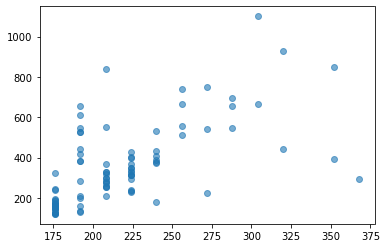

In [12]:
#查看单个类的散点图
plt.scatter(X_list[0], Y_list[0], alpha=0.6, label='类别0')  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
# plt.scatter(X_list[1], Y_list[1], alpha=0.6, label='类别1')  # 绘制散点图，透明度为0.6（这样颜色浅一点，比较好看）
plt.show()

F:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0, flags=flags)
F:\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 21035 missing from current font.
  font.set_text(s, 0, flags=flags)


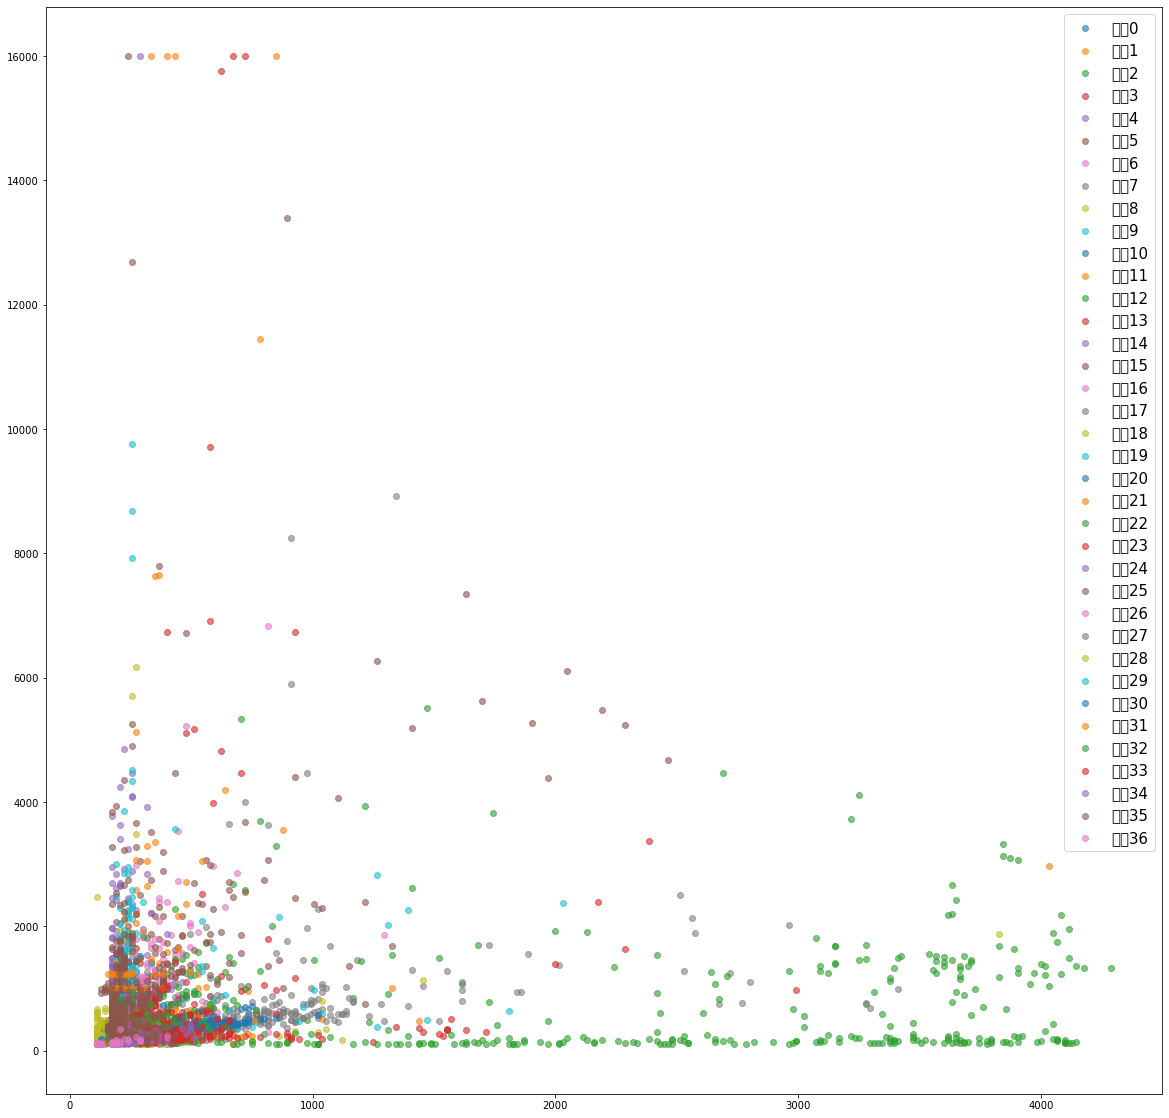

In [13]:
plt.figure(figsize=(20,20))#设置图表大小
for i in range(len(X_list)):
#     print("类别%s"%(i))#动态命名
    plt.scatter(X_list[i], Y_list[i], alpha=0.6, label='类别%s'%(i))
plt.legend(fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()